In [1]:
import numpy as np
from src import util
from src.linear_model import LinearModel

## (a) Hessian matrix

derivate two parts

$$
\begin{align}
f(\theta) &= \frac{1}{m}\sum_{i=1}^{m} -y \log(g(\theta^T x)) + (1 - y)\log(1 - g(\theta^{T}x)) \newline
\frac{\partial f}{\partial \theta} &= \frac{1}{m}\sum_{i=1}^{m} -\frac{yg(\theta^T x)'}{g(\theta^T x)} + \frac{(1-y)g(\theta^T x)'}{1-g(\theta^T x)} \newline
&= \frac{1}{m}\sum_{i=1}^{m} -\frac{y(g(\theta^T x)(1 - g(\theta^T x))}{g(\theta^T x)}(\theta^T x)' + \frac{(1-y)g(\theta^T x)(1 -g(\theta^T x))}{1-g(\theta^T x)} (\theta^T x)'  \newline
&= \frac{1}{m}\sum_{i=1}^{m} -\frac{y(g(\theta^T x)(1 - g(\theta^T x))}{g(\theta^T x)}x + \frac{(1-y)g(\theta^T x)(1 -g(\theta^T x))}{1-g(\theta^T x)} x  \newline
&= \frac{1}{m}\sum_{i=1}^{m} -x(y(1 - g(\theta^T x)) - (1-y)g(\theta^T x)) \newline
&= \frac{1}{m}\sum_{i=1}^{m} -x(y^{(i)} - g(\theta^T x^{(i)})) \newline
&= \frac{1}{m}\sum_{i=1}^{m} (g(\theta^T x^{(i)}) - y^{(i)})x^{(i)}
\end{align}
$$

Now get individual Hessian, negetive are removed after derive:

$$
\begin{align}
H_{jk} &= \frac{\partial^{2} f} {\partial \theta_k \partial \theta_j} \newline
&= \frac{1}{m}\sum_{i=1}^{m} \frac{\partial g(\theta^T x^{(i)})}{\partial \theta_k}x_j  \newline
&= \frac{1}{m}\sum_{i=1}^{m} g(\theta^T x^{(i)})(1 - g(\theta^T x^{(i)}))x_j^{(i)} x_k^{(i)}  \newline
\end{align}
$$

Now we can convert it to Hessian matrix:

$$
H= \frac{1}{m}\sum_{i=1}^{m} g(\theta^T x^{(i)})(1 - g(\theta^T x^{(i)}))x^{(i)} x^{(i)T}
$$

Need to prove $z^THz \geq 0$:

$$
\begin{align}
z^THz &= z^T(\frac{1}{m}\sum_{i=1}^{m} g(\theta^T x^{(i)})(1 - g(\theta^T x^{(i)}))x^{(i)} x^{(i)T})z \newline
&= \frac{1}{m}\sum_{i=1}^{m} g(\theta^T x^{(i)})(1 - g(\theta^T x^{(i)}))z^Tx^{(i)} x^{(i)T}z \newline
&= \frac{1}{m}\sum_{i=1}^{m} g(\theta^T x^{(i)})(1 - g(\theta^T x^{(i)}))((x^{(i)}Tz)^T(x^{(i)}Tz)) \newline
&= \frac{1}{m}\sum_{i=1}^{m} g(\theta^T x^{(i)})(1 - g(\theta^T x^{(i)}))(z^Tx^{(i)})^{2}
\end{align}
$$

since g(z) is between 0 and 1, thus $z^THz \geq 0 .$

---

## (b) Logistic Regression with Newton's Method

In [2]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        if self.theta == None:
            self.theta = np.zeros(n)

        def g(z):
            return 1 / (1 + np.exp(-z))

        while True:
            theta_old = self.theta
            theta_x = x @ theta_old
            cost = -1 / m * y @ np.log(g(theta_x)) + (1 - y) @ np.log(1 - g(theta_x))
            if self.verbose:
                print("cost: ", cost)
            grad = (1 / m) * (g(theta_x) - y) @ x
            H = (1 / m) * g(theta_x) @ (1 - g(theta_x)) * x.T @ x
            H_inv = np.linalg.inv(H)

            self.theta = self.theta - H_inv @ grad
            if np.linalg.norm(self.theta - theta_old, 1) < self.eps:
                break

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        def g(z):
            return 1 / (1 + np.exp(-z))

        prob = g(x @ self.theta)
        return prob > 0.5
        # *** END CODE HERE ***


Accuracy: 0.900
Precision: 0.960
Recall: 0.857
F1 Score: 0.906


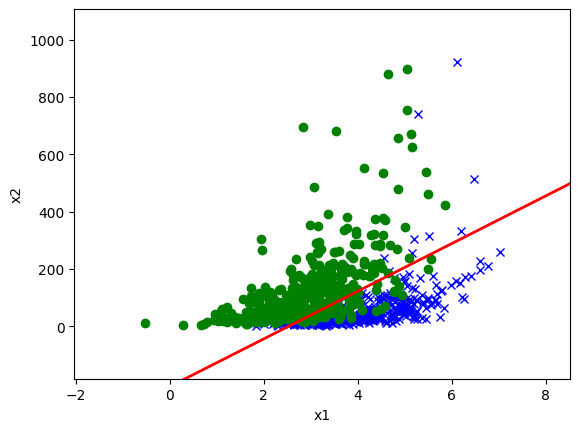

In [3]:
def main_b(train_path, eval_path=None, pred_path=None):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)

    # *** START CODE HERE ***
    clf = LogisticRegression(verbose=False)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_eval)
    util.calculate_metrics(pred, y_eval)
    util.plot(x_train, y_train, theta=clf.theta)
    # *** END CODE HERE ***

main_b("./data/ds1_train.csv", eval_path="./data/ds1_valid.csv")


---

## (c) Generative Algo: proove GDA equation can be convert to Logistic regression

The GDA model can be written as:

$$
p(x | y; \mu, \Sigma) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)) \tag{1} 
$$

where $\mu$ is the mean of the multivariate normal distribution, $\Sigma$ is the covariance matrix, and n is the number of features.
The posterior probability $p(y=1 | x; \mu_0, \mu_1, \Sigma)$ can be obtained using Bayes' theorem:
$$
p(y=1 | x; \mu_0, \mu_1, \Sigma) = \frac{p(x | y=1; \mu_0, \mu_1, \Sigma)p(y=1)}{p(x)} \tag{2} 
$$
where p(x) is the total probability of x, which can be calculated as:
$$
p(x) = p(x | y=0; \mu_0, \Sigma)p(y=0) + p(x | y=1; \mu_1, \Sigma)p(y=1) \tag{3}  
$$
Substituting the (2) with above equation, we get:
$$
p(y=1 | x; \mu_0, \mu_1, \Sigma) = \frac{p(x | y=1; \mu_1, \Sigma)p(y=1)}{p(x | y=0; \mu_0, \Sigma)p(y=0) + p(x | y=1; \mu_1, \Sigma)p(y=1)} \tag{4} 
$$
Divide $p(x | y=1; \mu_1, \Sigma)p(y=1)$ on both numerator and denominator, we get:
$$
p(y=1 | x; \mu_0, \mu_1, \Sigma) = \frac{1}{1 + \frac{p(x | y=0; \mu_0, \Sigma)p(y=0)}{p(x | y=1; \mu_1, \Sigma)p(y=1)}} \tag{5} 
$$







Then substituting (1) the GDA model to above equation, we get the form of a logistic function:
$$
\begin{align}
\frac{p(x | y=0; \mu_0, \Sigma)p(y=0)}{p(x | y=1; \mu_1, \Sigma)p(y=1)} &= \frac{\exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0))}{\exp(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))} \newline
&= \exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0) - (-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))) \\
&= \exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0) + \frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)) \\
&= \exp(-\frac{1}{2}x^T\Sigma^{-1}x + \mu_0^T\Sigma^{-1}x - \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0 + \frac{1}{2}x^T\Sigma^{-1}x - \mu_1^T\Sigma^{-1}x + \frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1) \\
&= \exp((\mu_0 - \mu_1)^T\Sigma^{-1}x - \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0 + \frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1)
\end{align}
$$

This can be rewritten as $-\theta^T x - \theta_0$, where $\theta = -\Sigma^{-1}(\mu_0 - \mu_1)$ and $\theta_0 = \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0 - \frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1$.

Therefore, the equation simplifies to $\exp(-(\theta^T x + \theta_0))$, thus:

$$
p(x | y; \mu, \Sigma) = \frac{1}{1 + \exp(-(\theta^T x + \theta_0))}.
$$

<br>

### Note:

__*__ When you expand the term $(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)$, you get $x^T\Sigma^{-1}x - x^T\Sigma^{-1}\mu_0 - \mu_0^T\Sigma^{-1}x + \mu_0^T\Sigma^{-1}\mu_0$.

The term $x^T\Sigma^{-1}\mu_0$ is a __scalar__, and it's equal to its transpose $\mu_0^T\Sigma^{-1}x$. So, you can combine these two terms to get $-2\mu_0^T\Sigma^{-1}x$.

Finally, when you multiply this by $\frac{1}{2}$, you get $\frac{1}{2}x^T\Sigma^{-1}x - \mu_0^T\Sigma^{-1}x + \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0$.

<br>

__*__ The term $x^T\Sigma^{-1}\mu_0$ is a scalar because it is the result of a series of matrix operations that ultimately result in a 1x1 matrix, which is equivalent to a scalar. 

Here's why:

1. $x^T$ is a 1xN matrix, where N is the number of elements in the vector $x$.
2. $\Sigma^{-1}$ is an NxN matrix, where N is the number of elements in the vector $x$.
3. $\mu_0$ is an Nx1 matrix, where N is the number of elements in the vector $x$.

When you multiply these three matrices together, you get a 1x1 matrix, which is equivalent to a scalar.

The term $x^T\Sigma^{-1}\mu_0$ is equal to its transpose $\mu_0^T\Sigma^{-1}x$ because the transpose of a scalar is the scalar itself. This is a property of transposes: the transpose of a scalar is the scalar itself. 

Also, the transpose of a product of matrices is the product of their transposes in reverse order. So, $(x^T\Sigma^{-1}\mu_0)^T = \mu_0^T(\Sigma^{-1})^Tx = \mu_0^T\Sigma^{-1}x$ because $\Sigma^{-1}$ is symmetric (i.e., equal to its own transpose).




---

## (d) Prove maximum log-likehood function can be conver to...

Because rule of multiplication of dependent events $P(A \cap B) = P(B|A)P(B) = P(A|B)P(B)$

$$
\begin{align}
\ell(\phi, \mu_0, \mu_1, \Sigma) &= \log\prod^m_{i=1} p(x^{(i)}, y^{(i)} ; \phi, \mu_0, \mu_1, \Sigma) \\
&= \log\prod^m_{i=1} p(x^{(i)} |  y^{(i)} ;\mu_0, \mu_1, \Sigma) p(y^{(i)};\phi)
\end{align}
$$

Let $\mu_k$ as mean, where $k \in\{0,1\}$, then substitution the probability:
$$
\begin{align}
&= \log\prod^m_{i=1} p(x^{(i)} |  y^{(i)} ;\mu_k, \Sigma) p(y^{(i)};\phi) \\
&= \log\prod^m_{i=1} \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} \exp \left(-\frac{1}{2}(x^{(i)} - \mu_k)^{T}\Sigma^{-1}(x^{(i)} -\mu_k)\right) \phi^{y^{(i)}} (1-\phi)^{1-y^{(i)}} \\
&= \log\prod^m_{i=1} (2\pi)^{-n/2} |\Sigma|^{-1/2}      \exp \left(-\frac{1}{2}(x^{(i)} - \mu_k)^{T}\Sigma^{-1}(x^{(i)} -\mu_k)\right) \phi^{y^{(i)}} (1-\phi)^{1-y^{(i)}} \\
&= \sum_{i=1}^{m} \left[ -\frac{n}{2} \log(2\pi) - \frac{1}{2} \log|\Sigma| - \frac{1}{2}(x^{(i)} - \mu_k)^{T} \Sigma^{-1}(x^{(i)}-\mu_k) + y^{(i)} \log\phi + (1-y^{(i)}) \log(1-\phi) \right]
\end{align}
$$

Then we do partial derivative with respect to those parameters and solve for $=0$ to get maximum likelyhood of them, first $\frac{\partial\ell}{\partial\phi}=0$:

$$\begin{align}
\frac{\partial\ell}{\partial\phi} &= \sum_{i=1}^{m}\left( \frac{y^{(i)}}{\phi} - \frac{1-y^{(i)}}{1-\phi} \right) = 0 \\
&= \sum_{i=1}^{m}  y^{(i)}(1-\phi) - \phi(1-y^{(i)}) \\
&= \sum_{i=1}^{m} y^{(i)} - \phi y + \phi y^{(i)} -\phi  \\
&= \sum_{i=1}^{m} (y^{(i)} -\phi) \\
&= \sum_{i=1}^{m} y^{(i)} = m\phi
\end{align}$$

Thus :

$$
\phi = \frac{1}{m} \sum_{i=1}^{m} y^{(i)} = \frac{1}{m} \sum_{i=1}^{m} 1 \{y^{(i)} = 1\}  
$$

Next $\frac{\partial\ell}{\partial \mu_0}$ and $\frac{\partial\ell}{\partial \mu_1} = 0$, let $a = x^{(i)} -\mu_k $ and $A=\Sigma^{-1}$, and chain rule then we get :

$$\begin{align}
\frac{\partial\ell}{\partial \mu_k} &= \sum_{i=1}^{m} -(\frac{1}{2} a^{T}Aa)\frac{\partial \ell}{\partial a} \\
&= \sum_{i=1}^{m} -\frac{1}{2} 2 A a \frac{\partial a}{\partial \mu_k} \\
&= \sum_{i=1}^{m} -\frac{1}{2} 2 \Sigma^{-1} ( x^{(i)} - \mu_k) \frac{\partial a}{\partial \mu_k} \\
&= - \sum_{i=1}^{m} \Sigma^{-1} ( x^{(i)} - \mu_k) \frac{\partial a}{\partial \mu_k} = 0 \\
&= \sum_{i=1}^{m}( x^{(i)} - \mu_k) \frac{\partial a}{\partial \mu_k} \\
\sum_{i=1}^{m}x^{(i)} \frac{\partial a}{\partial \mu_k} &= \sum_{i=1}^{m}\mu_k \frac{\partial a}{\partial \mu_k}
\end{align}
$$

When $k=0$ or $k=1$, $\frac{\partial a}{\partial \mu_k} = -1$,

$$
\sum_{i=1}^{m}x^{(i)} = \sum_{i=1}^{m}\mu_0 \\
\Rightarrow	\mu_0 = \frac{\sum_{i=1}^{m} 1\{y^{(i)} = 0\} x^{(i)}}{\sum_{i=1}^{m} 1\{y^{(i)} = 0\}} = \frac{\sum_{i=1}^{m} 1\{y^{(i)} = 0\} x^{(i)}}{m} 
$$

<br>

For $\Sigma$,

$$\begin{align}
\frac{\partial \ell}{\partial \Sigma} &= -\sum_{i=1}^{m} \frac{1}{2} \log(|\Sigma|) + \frac{1}{2} (x^{(i)} - \mu)^T \Sigma^{-1} (x^{(i)} - \mu) \\
&= -\frac{m}{2} \Sigma^{-1} + \frac{1}{2} \sum_{i=1}^{m} \Sigma^{-1} (x^{(i)} - \mu) (x^{(i)} - \mu)^T \Sigma^{-1}=0\\
&\Rightarrow \Sigma^{-1} = \frac{1}{m} \sum_{i=1}^{m} \Sigma^{-1} (x^{(i)} - \mu) (x^{(i)} - \mu)^T \Sigma^{-1} \\
&\Rightarrow \Sigma \Sigma^{-1} = \frac{1}{m} \sum_{i=1}^{m} \Sigma \Sigma^{-1} (x^{(i)} - \mu) (x^{(i)} - \mu)^T \Sigma^{-1} \\
&\Rightarrow \Sigma \Sigma^{-1}\Sigma = \frac{1}{m} \sum_{i=1}^{m} \Sigma \Sigma^{-1} (x^{(i)} - \mu) (x^{(i)} - \mu)^T \Sigma^{-1}\Sigma \\
&\Rightarrow \Sigma = \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \mu) (x^{(i)} - \mu)^T
\end{align}$$ 

### Note:


__*__ In the context of this equation, the semicolon ";" is used to separate the parameters of the function from the variables. 

The function $log(\prod^m_i p(x^{(i)}, y^{(i)}))$ is being evaluated at the specific values of $(\phi, \mu_0, \mu_1, \Sigma)$. 

So, the semicolon is essentially saying "given these specific values of the parameters".

<br>

__*__ The function $f(a) = a^T A a$ is a quadratic form. To find its derivative with respect to the vector $a$, we can use the [matrix calculus rule](https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-vector_identities) for the derivative of a quadratic form.

The derivative of a quadratic form $f(a) = a^T A a$ with respect to the vector $a$ is given by the formula:

$$
\frac{df}{da} = (A + A^T)a = 2Aa  =2a^TA
$$

This is because the derivative of $a^T A a$ with respect to $a$ is $2Aa$ if $A$ is symmetric. If $A$ is not necessarily symmetric, we have to take into account the contribution from both $A$ and its transpose $A^T$.

So, the derivative of $f(a) = a^T A a$ with respect to $a$ is $a^T(A + A^T)$ if we want to keep the result as a row vector. If we want the result as a column vector, it should be $(A + A^T)a$.

Note: In some references, the derivative of a quadratic form is given as $2Aa$ or $2a^TA$, assuming that the matrix $A$ is symmetric. This is a special case of the more general formula given above.

<br>

__*__ The derivative of $\log(|\Sigma|)$ with respect to $\Sigma$ is given by $(\Sigma^{-1})^T$, so we have:

$$
\frac{\partial}{\partial \Sigma} \left(-m \frac{1}{2} \log(|\Sigma|)\right) = -m \frac{1}{2} (\Sigma^{-1})^T = -m \frac{1}{2} (\Sigma^{-1})
$$

The derivative of the logarithm of the determinant of a matrix with respect to the matrix is a well-known result in matrix calculus. If $X$ is an invertible matrix, then the derivative of $\log(\det(X))$ with respect to $X$ is given by $(X^{-1})^T$. This result can be derived using the properties of the determinant and the trace.
Source : https://math.stackexchange.com/questions/1151569/how-to-calculate-the-derivative-of-log-det-matrix


---

## (e) Implement GDA 

### How to obtain the parameters `theta`?

The GDA model assumes that the class-conditional densities p(x|y) are Gaussian distributions with shared covariance matrix Σ. The means of these Gaussians are μ0 and μ1 for y=0 and y=1 respectively. The prior probability of y=1 is φ.

The log-likelihood of the GDA model is given by:

$$
\log p(y|x) = \log \left( \frac{p(x|y) p(y)}{p(x)} \right)
$$

Using Bayes' rule, we can write this as:

$$
\log p(y|x) = \log p(x|y) + \log p(y) - \log p(x)
$$

The log-likelihood of the Gaussian distribution is: (where n is the dimension of x)

$$
\log p(x|y) = -\frac{1}{2} (x - \mu_y)^T \Sigma^{-1} (x - \mu_y) - \frac{1}{2} \log |\Sigma| - \frac{n}{2} \log(2\pi)
$$

The log-prior is:

$$
\log p(y) = y \log \phi + (1-y) \log (1-\phi)
$$

Substituting these into the equation for the log-likelihood gives:

$$
\log p(y|x) = -\frac{1}{2} (x - \mu_y)^T \Sigma^{-1} (x - \mu_y) - \frac{1}{2} \log |\Sigma| - \frac{n}{2} \log(2\pi) + y \log \phi + (1-y) \log (1-\phi) - \log p(x)
$$

We can ignore the terms that do not depend on y for the purpose of classification. This gives:

$$
\log p(y|x) = -\frac{1}{2} (x - \mu_y)^T \Sigma^{-1} (x - \mu_y) + y \log \phi + (1-y) \log (1-\phi)
$$

Expanding the quadratic form and collecting terms gives:

$$
\log p(y|x) = -\frac{1}{2} x^T \Sigma^{-1} x + x^T \Sigma^{-1} \mu_y - \frac{1}{2} \mu_y^T \Sigma^{-1} \mu_y + y \log \phi + (1-y) \log (1-\phi)
$$

This can be written in the form of a linear classifier as:

$$
\log \frac{p(y=1|x)}{p(y=0|x)} = x^T \Sigma^{-1} (\mu_1 - \mu_0) - \frac{1}{2} \mu_1^T \Sigma^{-1} \mu_1 + \frac{1}{2} \mu_0^T \Sigma^{-1} \mu_0 + \log (\frac{\phi}{1 - \phi})
$$

In a logistic regression model, the log-odds of `y = 1` given `x` is given by:

$$
\log\left(\frac{p(y=1|x)}{p(y=0|x)}\right) = \theta_0 + x^T\theta[1:]
$$

where $\theta$ is the vector of parameters of the logistic regression model. Equating the two expressions for the log-odds and comparing the coefficients, we get:

$$
\theta_0 = \log\left(\frac{\phi}{1-\phi}\right) - \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0 + \frac{1}{2}\mu_1^{T}\Sigma^{-1}\mu_1
$$

$$
\theta[1:] = \Sigma^{-1}(\mu_1 - \mu_0)
$$


In [4]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m, n = x.shape
        phi = (1/m) * np.sum(y)
        mu_0 = np.sum(x * (1 - y).reshape(-1, 1), axis=0) / np.sum(1 - y)
        mu_1 = np.sum(x * y.reshape(-1, 1), axis=0) / np.sum(y)
        sig = 1/m * ((x - mu_0) * (1 - y).reshape(-1, 1)).T @ (x - mu_0) + 1/m * ((x - mu_1) * y.reshape(-1, 1)).T @ (x - mu_1)
        sig_det = np.linalg.det(sig)
        sig_inv = np.linalg.inv(sig)

        theta = np.zeros(n + 1)
        theta[0] = np.log(phi / (1 - phi)) - 1/2 * (mu_1 + mu_0).T @ sig_inv @ (mu_1 - mu_0)
        theta[1:] = sig_inv @ (mu_1 - mu_0)
        self.theta = theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        p = 1 / (1 + np.exp(-x @ self.theta[1:] - self.theta[0]))
        return (p >= 0.5).astype(int)
        # *** END CODE HERE


In [5]:
def main_e(train_path, eval_path, pred_path):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    x_val, y_val = util.load_dataset(eval_path, add_intercept=False)
    # *** START CODE HERE ***
    
    gda = GDA()
    gda.fit(x_train, y_train)
    pred = gda.predict(x_val)
    util.calculate_metrics(pred, y_val)


    # *** END CODE HERE ***
main_e("./data/ds1_train.csv","./data/ds1_valid.csv","")

Accuracy: 0.830
Precision: 0.880
Recall: 0.800
F1 Score: 0.838


---

## (f) and (g)

GDA Acc: 
Accuracy: 0.830
Precision: 0.880
Recall: 0.800
F1 Score: 0.838

LogisticRegression Acc: 
Accuracy: 0.900
Precision: 0.960
Recall: 0.857
F1 Score: 0.906


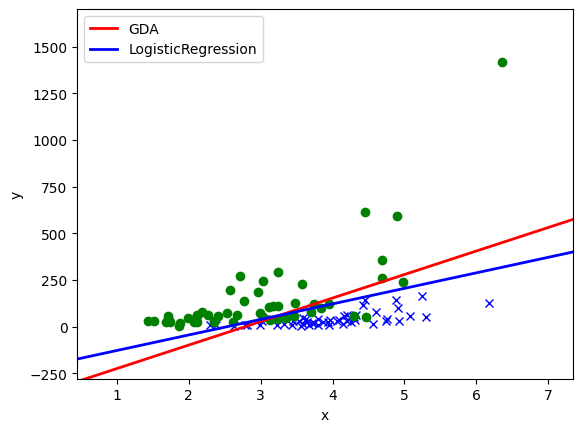

In [6]:
def main_fg(train_path, eval_path, pred_path=None):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    x_val, y_val = util.load_dataset(eval_path, add_intercept=False)
    # *** START CODE HERE ***
    gda = GDA()
    gda.fit(x_train, y_train)
    pred_gda = gda.predict(x_val)

    x_train = util.add_intercept(x_train)
    x_val = util.add_intercept(x_val)
    lr = LogisticRegression(verbose=None)
    lr.fit(x_train, y_train)
    pred_lr = lr.predict(x_val)

    print("GDA Acc: ")
    util.calculate_metrics(pred_gda, y_val)
    print()
    print("LogisticRegression Acc: ")
    util.calculate_metrics(pred_lr, y_val)

    util.plot2(x_val, y_val, theta= gda.theta, theta_1=lr.theta, theta_name="GDA",theta_1_name="LogisticRegression")

    # *** END CODE HERE ***
main_fg("./data/ds1_train.csv","./data/ds1_valid.csv")

GDA Acc: 
Accuracy: 0.910
Precision: 0.900
Recall: 0.918
F1 Score: 0.909

LogisticRegression Acc: 
Accuracy: 0.910
Precision: 0.880
Recall: 0.936
F1 Score: 0.907


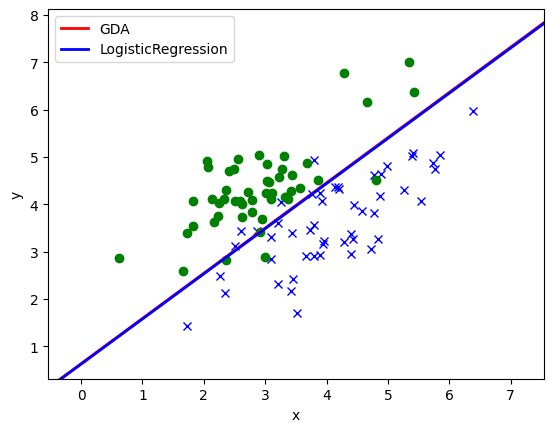

In [7]:
main_fg("./data/ds2_train.csv","./data/ds2_valid.csv","")

Dataset 1 is wrose with GDA model, because `ds1` data point are overlapped, not show clear __distribution__, but GDA's model is based on it where as logistic regression based on __desicion boundary__ , if a dataset that is overlapped too much we should avoid using generative model. 